# Section 3. Hypothesis Testing

In this section, we will focus on how to use statistical methods to test out hypothses that we prosposed. We will give 

### CONTENTS

* <a href='02- DSC 2022 Exploratory Data Analysis.ipynb#top'>**Section 2. Exploratory Data Analysis**</a> 
* <a href='03 - DSC 2022 Hypothesis testing.ipynb#top'>**Section 3. Hypothesis Testing**</a> 
  * [1. T-test](#t)
  * [2. ANOVA](#anova)
* <a href='04- DSC 2022 Feature Engineering .ipynb#top'>**Section 4. Feature Engineering**</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmg = pd.read_excel('cmg.xlsx' ,index_col = 'offeringId')
cmg.head(5)

offeringPricingDate offeringType  \
offeringId                                                              
b969a1c8-0a26-438a-81e6-5e95f3b30501          2003-10-02          IPO   
1081394b-c9f2-4479-8dd2-528027ff1eea          2005-07-21          IPO   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0          2005-08-04          IPO   
43f06950-8d20-4cfc-b16d-237e0927e1e6          2005-11-10          IPO   
96a13598-121a-41c0-83b5-448843cd8709          2006-02-03          IPO   

                                              offeringSector  \
offeringId                                                     
b969a1c8-0a26-438a-81e6-5e95f3b30501       Consumer Cyclical   
1081394b-c9f2-4479-8dd2-528027ff1eea  Communication Services   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0  Communication Services   
43f06950-8d20-4cfc-b16d-237e0927e1e6             Industrials   
96a13598-121a-41c0-83b5-448843cd8709                  Energy   

                                                   offeringSubSector  \
offeringId                                                             
b969a1c8-0a26-438a-81e6-5e95f3b30501                Vehicles & Parts   
1081394b-c9f2-4479-8dd2-528027ff1eea                Telecom Services   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0  Internet Content & Information   
43f06950-8d20-4cfc-b16d-237e0927e1e6             Consulting Services   
96a13598-121a-41c0-83b5-448843cd8709             Oil & Gas Midstream   

                                      offeringDiscountToLastTrade  \
offeringId                                                          
b969a1c8-0a26-438a-81e6-5e95f3b30501                          0.0   
1081394b-c9f2-4479-8dd2-528027ff1eea                          0.0   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0                          0.0   
43f06950-8d20-4cfc-b16d-237e0927e1e6                          0.0   
96a13598-121a-41c0-83b5-448843cd8709                          0.0   

                                      offeringPrice issuerCusip  \
offeringId                                                        
b969a1c8-0a26-438a-81e6-5e95f3b30501           13.0   501889208   
1081394b-c9f2-4479-8dd2-528027ff1eea           13.0   209034107   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0           27.0   056752108   
43f06950-8d20-4cfc-b16d-237e0927e1e6           16.0   G47567105   
96a13598-121a-41c0-83b5-448843cd8709           21.0   29273V100   

                                                           issuerName  \
offeringId                                                              
b969a1c8-0a26-438a-81e6-5e95f3b30501        BharCap Acquisition Corp.   
1081394b-c9f2-4479-8dd2-528027ff1eea        GrandSouth Bancorporation   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0  Brand Velocity Acquisition Corp   
43f06950-8d20-4cfc-b16d-237e0927e1e6                     ProLung Inc.   
96a13598-121a-41c0-83b5-448843cd8709     Golden Star Acquisition Corp   

                                      pre15_Price_Normalized  \
offeringId                                                     
b969a1c8-0a26-438a-81e6-5e95f3b30501                     NaN   
1081394b-c9f2-4479-8dd2-528027ff1eea                     NaN   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0                     NaN   
43f06950-8d20-4cfc-b16d-237e0927e1e6                     NaN   
96a13598-121a-41c0-83b5-448843cd8709                     NaN   

                                      pre14_Price_Normalized  ...  \
offeringId                                                    ...   
b969a1c8-0a26-438a-81e6-5e95f3b30501                     NaN  ...   
1081394b-c9f2-4479-8dd2-528027ff1eea                     NaN  ...   
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0                     NaN  ...   
43f06950-8d20-4cfc-b16d-237e0927e1e6                     NaN  ...   
96a13598-121a-41c0-83b5-448843cd8709                     NaN  ...   

                                      pre1_Price_Normalized  \
offeringId                                                    
b969a1c8-0a26-438a-81e6-5e95f3b30501          

<a id='t'></a>
## 1. T-test

For hypothesis testing  the first step is always to state clearly a null hypothesis and its alternative hypothesis. The rationale is that if we assumed that the null hypothesis is true, how likely we are to see the data we currently observe, the probability is called p-value. If such p-value is extremely small, then we have some confidence such that our initial null hypothesis is False. Or put it into a more statistical way, we reject the null hypothesis with xx confidendece. 

Hypothesis: if a deal was made at a discount, then the deal would likely to have worse performance in the future. 

The key assumption of a t-test is that under each one of the two levels, the data is noramlly distributed(Gaussian) . Be sure to always check the underlying assumptions before performing any analysis.

According to the boxplot, we observe that for both discount and no-discount group, the distribution of one-day performance is normally distributed. 

<AxesSubplot:xlabel='discount', ylabel='post180_Price_Normalized'>

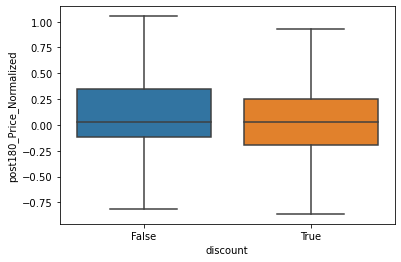

In [3]:
cmg['discount'] = cmg['offeringDiscountToLastTrade']<0
sns.boxplot(x="discount", y="post180_Price_Normalized", data=cmg,showfliers = False)

In [4]:
from scipy.stats import ttest_ind
ttest_ind(cmg['post180_Price_Normalized'][cmg['discount'] == True],
                cmg['post180_Price_Normalized'][cmg['discount'] == False])

Ttest_indResult(statistic=-5.8045823240281385, pvalue=6.68457451665945e-09)

<a id='anova'></a>
## 2. One Way - Analysis of Variance (ANOVA)

What happens when we have more than two categories for our explanatory variable? Then a t-test would not be enough. In this part, we introduce one way analysis of varaince(one-way ANOVA).

Prior to the hypothesis testing, let's agian first check if the assumption of ANOVA is satisfied. 

In [5]:
temp = cmg.groupby(by = 'offeringSector')['post180_Price_Normalized'].agg(['count', 'mean', 'median', 'var']).reset_index()
temp

offeringSector  count      mean    median        var
0          Basic Materials    236  0.397583  0.080492   4.542468
1   Communication Services    336  0.435917  0.034419   9.632329
2        Consumer Cyclical    688  0.245283  0.056183   1.386579
3       Consumer Defensive    282  0.520659  0.032268  19.129043
4                   Energy    704  0.456278  0.017172  17.794481
5       Financial Services   1286  0.109743  0.007645   0.723020
6               Healthcare   2301  1.105219  0.038298  57.294823
7              Industrials    680  0.426065  0.050143  15.044274
8              Real Estate    788  0.066846  0.014408   0.663802
9               Technology   1037  0.242751  0.062857   1.558506
10               Utilities    151  0.022631  0.020448   0.138558

<AxesSubplot:xlabel='offeringSector', ylabel='post180_Price_Normalized'>

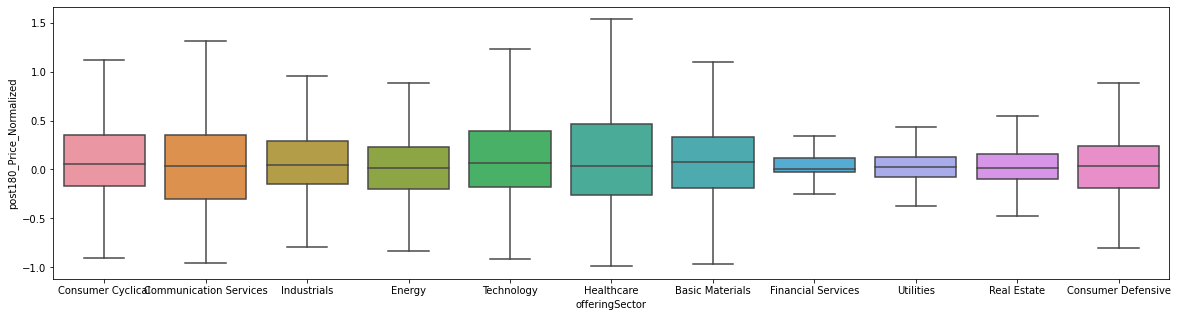

In [6]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'offeringSector', y = 'post180_Price_Normalized', data = cmg, showfliers = False)

Since the p-value is extremely small(almost 0), which is clearly smaller than our preset cofidence level threshold(alpha = 0.05). Then we shall reject the null hypothesis and claim that sector matters. 

In [7]:
performanceBySector = cmg.filter(items = ["offeringSector","post180_Price_Normalized"]).pivot(columns = "offeringSector", values = "post180_Price_Normalized")

In [8]:
from scipy.stats import f_oneway
F, p = f_oneway(
                performanceBySector['Communication Services'].dropna(),
                performanceBySector['Consumer Cyclical'].dropna(),
                performanceBySector['Consumer Defensive'].dropna(), 
                performanceBySector['Energy'].dropna(), 
                performanceBySector['Financial Services'].dropna(),
                performanceBySector['Healthcare'].dropna(),
                performanceBySector['Industrials'].dropna(),
                performanceBySector['Real Estate'].dropna(),
                performanceBySector['Technology'].dropna(),
                performanceBySector['Utilities'].dropna())
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=7.344, p=0.000


If you are intersted in more in-depth explanations, check out  
https://www.stat.cmu.edu/~hseltman/309/Book/chapter7.pdf for one-way ANOVA
https://www.stat.cmu.edu/~hseltman/309/Book/chapter11.pdf for two-way ANOVA.